# set up: load data & imports 

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error as mse
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import log_loss, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from xgboost import XGBClassifier
from scipy.stats import uniform
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [2]:
#read in data and make a copy
anes = pd.read_csv('data/anes_pilot_2020ets_csv.csv')
data = anes.copy(deep = True)

In [3]:
data.shape

(3080, 470)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Columns: 470 entries, V1 to vidknow
dtypes: float64(3), int64(453), object(14)
memory usage: 11.0+ MB


In [5]:
data.describe()

,V1,_v1,follow,reg1,votemail1a,votemail1b,votecount,votemail2,voterid1,voterid2,...,rr_scale,white,black,namer,asian,hpi,mixed,race7,vidx,vidknow
count,3080.00000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,...,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3078.000000,3080.000000
mean,1540.50000,3798.924026,1.644156,1.290584,46.673377,39.099351,3.329221,2.751948,1.547727,3.457468,...,8.692857,0.701623,0.106169,0.005195,0.036364,0.001948,0.034091,1.785714,1.816439,0.407792
std,889.26374,10553.322567,0.876972,0.724222,42.500686,36.917557,1.093571,1.310572,0.776603,2.807707,...,5.998361,0.457620,0.308104,0.071899,0.187224,0.044101,0.282326,1.430945,1.272351,0.491504
min,1.00000,464.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,770.75000,1643.750000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1540.50000,2233.500000,1.000000,1.000000,88.000000,7.000000,3.000000,3.000000,1.000000,2.000000,...,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,2310.25000,3211.250000,2.000000,1.000000,88.000000,77.000000,4.000000,4.000000,2.000000,7.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000
max,3080.00000,255418.000000,9.000000,4.000000,88.000000,77.000000,9.000000,9.000000,9.000000,9.000000,...,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,3.000000,1.000000


# dropping irrelevant columns
- explain here 

In [6]:
# dropping irrelevant columns 
data.drop(inplace=True, columns=[ 'votemail1b', 'V1', 'StartDate', 'EndDate', '_v1', 'RecordedDate', 
                                 'ResponseId','qmetadata_Browser', 'qmetadata_Version', '_v2', 
                                 'qmetadata_Resolution', 'check','relig1_11_TEXT', 'mauga', 'pk_cjus', 
                                 'pk_germ', 'ethnic1', 'ethnic2', 'ethnic3', 'mixed', 'hpi', 'asian', 'namer',
                                'black', 'white', 'race1_hpi', 'race1_asian', 'race1_namer', 'race1_black', 'race1_white',
                                'hispanicr', 'nonhispanic_white', 'hispanic_white', 'hispanic', 'pid2r', 'pk_index',
                                'survexp1', 'survexp2', 'dejavu', 'surv_comp', 'RAND_INC', 'XCONTACT', 'XFORGIVE', 'FEEDBACK_GROUP',
                                'INSTRUCTION_GROUP', 'form', 'serious', 'admit', 'geer1896', 'pk_sen', 'pk_spend', 'expshark',
                                'inc_cps', 'inc_cpsmod', 'marital2', 'whites_1', 'whites_2', 'whites_3',
                                'whites_4', 'whites_5', 'whites_6', 'whites_7', 'blacks_1', 'blacks_2', 'blacks_3',
                                'blacks_4', 'blacks_5', 'blacks_6', 'blacks_7', 'hisp_1', 'hisp_2', 'hisp_3',
                                'hisp_4', 'hisp_5', 'hisp_6', 'hisp_7', 'asians_1', 'asians_2', 'asians_3', 'asians_4',
                                'asians_5', 'asians_6','asians_7', 'survexp1', 'survexp2', 'dejavu', 'citizen1', 'citizen2',
                                'particip_count', 'pk_mauga_correct', 'pk_germ_correct', 'pk_cjus_correct', 'pk_sen_correct',
                                'pk_spend_correct', 'pk_cjus_correctb', 'pk_index', 'pidstr1_dr', 'pidstr1_ind', 'pidstr2_dr',
                                 'pidstr2_ind','pidstr3_dr', 'pidstr3_ind', 'pid7str', 'hispanic', 'hispanic_white', 'nonhispanic_white',
                                'hispanicr', 'race1_white', 'race1_black', 'race1_namer', 'race1_hpi', 'white', 'black',
                                'namer', 'asian', 'hpi', 'mixed'])

In [7]:
data.shape

(3080, 371)

In [8]:
data.isna().sum()

follow        0
reg1          0
votemail1a    0
votecount     0
votemail2     0
             ..
pid7          0
rr_scale      0
race7         0
vidx          2
vidknow       0
Length: 371, dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(3078, 371)

# pre processing for target variable, dropping nulls

In [11]:
#dropping the 2 non responses for the covid questions 
data.drop(data[data['mis_covid1'] == 9].index, inplace=True)

In [12]:
data.drop(data[data['mis_covid2'] == 9].index, inplace=True)

# dropping place holders to get ready for imputing

In [13]:
#dropping the placeholder values for missing 
data_6 = ['pidstr',  'pidlean', 'pidstr1', 'pidstr2', 'pidstr3', 'relig2a',
     'att2', 'att3', 'fundmt1', 'fundmt2', 'whitejob', 'femid2_fem', 'femid2_anti',
     'femid2_nei', 'callout3a','callout3b','viol3_dems', 'viol3_reps', 'viol3_both']
for column in data_6:
    data[column].replace(6, np.nan, inplace=True)

In [14]:
data_9 = ['follow', 'votemail2', 'voterid1', 'voterid2', 'vote16', 'hopeful', 'worried', 'irritated', 'talk3', 
      'primaryvote', 'vote20jb', 'vote20bs', 'richpoor2', 'lcd', 'lcr', 'freemkt1a',
     'freemkt1b', 'govsize1a', 'govsize1b', 'ineqinc1a', 'antirelig1',
     'antirelig2', 'racist1','racist2', 'immignum', 'wall7', 'pathway', 
     'return', 'open', 'affact', 'hlthcare1', 'hlthcare2', 'covid1', 'covid2',
     'covid_elect', 'abort1', 'abort_imp', 'abort2', 'gayadopt', 'transmilit1a',
     'harass', 'diversity7', 'experts', 'science', 'exphelp', 'excessive',
     'compro1', 'compro2', 'pcorrect', 'selfcensor', 'childrear1', 'childrear2',
     'childrear3', 'rural2', 'rural3', 'rural4', 'conf_covid1', 'conf_covid2', 'impeach1', 'impeach2', 'pid1r', 
     'pidstr', 'pidlean', 'pidstr1', 'pidstr2', 'pidstr3', 'rr1', 'rr2',
     'rr3', 'rr4', 'relig2b', 'att1', 'att2', 'att3', 'fundmt1', 'fundmt2',
     'impact1', 'impact2', 'impact3', 'impact4', 'impact5', 'impact7', 'impact8',
     'impact9', 'whitejob', 'femid1a', 'femid1b', 'femid2_fem', 'knowtran1',
     'knowtran2_1', 'knowtran2_2', 'knowtran2_3', 'knowtran2_4', 'knowtran2_5',
     'knowtran2_6', 'knowgay1', 'knowgay2_1', 'knowgay2_2', 'knowgay2_3', 'knowgay2_4',
     'knowgay2_5', 'knowgay2_6', 'stress1', 'stress2', 'stress3', 'stress4',
     'depress1', 'depress2', 'depress3', 'depress4', 'depress5', 'callout1',
     'speech1', 'callout2', 'speech2', 'divmoral', 'forgive3', 'moralsup1',
     'duepro3', 'moralcert3', 'forgive5', 'intelsup1', 'moralcert1', 'duepro4',
     'moralcert6', 'forgive4', 'moralcert2', 'duepro1', 'callout3a','callout3b',
     'moralsup2', 'duepro2', 'intelsup2', 'duepro5', 'moralcert4', 'forgive6', 
     'moralcert5', 'link_bla','link_his', 'link_asi','link_whi', 'link_hpi', 'link_nat',
     'selfmon1', 'selfmon2', 'selfmon3', 'selfmon4', 'selfmon5', 'selfmon6', 'home_cps',
     'viol3_dems', 'viol3_reps', 'viol1', 'viol2a', 'viol2b', 'exptravel_ever', 
     'exphomesch', 'expconvert', 'expholiday', 'exparrest', 'exppubasst', 'expfight',
     'expavoid', 'callout_social', 'callout_person', 'expknowimmig', 'expbuyus',
     'expretire', 'expknowpris', 'marital1', 'home_ownership', 'vote20turnoutjb', 'pid7',
     'race7', 'taxecon']
for column in data_9: 
    data[column].replace(9, np.nan, inplace=True)

In [15]:
data_77 = ['healthcarepres7', 'dtleader2', 'jbleader2', 
     'bsleader2', 'billtax2', 'guarinc2', 'freemkt2', 'freemkt3',
     'govsize2', 'govsize3', 'regulate2', 'strpres1b', 'transmilit1b',
     'freecol2', 'loans2']
for column in data_77: 
    data[column].replace(77, np.nan, inplace=True)

In [16]:
data_8 = ['turnout16a', 'turnout16a1', 'freemkt1a', 'freemkt1b',
     'govsize1a', 'govsize1b', 'antirelig1', 'antirelig2', 'racist1',
     'racist2', 'transmilit1a', 'pcorrect', 'selfcensor', 'relig2a',
     'femid1a', 'callout1', 'speech1', 'callout2', 'speech2', 'divmoral',
     'forgive3', 'moralsup1', 'duepro3', 'moralcert3', 'forgive5','intelsup1', 
     'moralcert1', 'duepro4', 'moralcert6', 'forgive4', 'moralcert2', 'duepro1',
     'callout3a','callout3b', 'moralsup2', 'duepro2', 'intelsup2', 'duepro5',
     'moralcert4', 'forgive6', 'moralcert5', 'home_anes', 'viol2a']
for column in data_8:
    data[column].replace(8, np.nan, inplace=True)

In [17]:
data_7 = ['turnout16b', 'relig2b', 'femid1b', 'stress1', 'stress2', 'stress3',
     'stress4', 'depress1', 'depress2', 'depress3', 'depress4', 'depress5', 
     'link_bla','link_his','link_asi','link_whi', 'link_hpi', 'link_nat',
     'selfmon1', 'selfmon2', 'selfmon3', 'selfmon4', 'selfmon5', 'selfmon6',
     'home_cps', 'viol2b']
for column in data_7:
    data[column].replace(7, np.nan, inplace=True)

In [18]:
data_99 = ['apppres7', 'frnpres7', 'immpres7', 'econpres7', 'healthcarepres7', 
     'dtcares', 'dtdignif', 'dtauth', 'dtdiv', 'dtknow', 'jbleader1',
     'jbleader2', 'jbcares', 'jbdignif', 'jbhonest', 'jbauth', 'jbdiv',
     'jbknow', 'bsleader1', 'bsleader2', 'bscares', 'bsdignif', 'bshonest',
     'bsauth', 'bsdiv', 'bsknow', 'freemkt2', 'freemkt3', 'govsize2', 'govsize3',
           'forgive1a', 'forgive1b','forgive2b','finworry', 'confecon', 'taxecon', 
     'regulate2', 'strpres1b', 'tol_rally', 'tol_pres', 'tol_teach',
     'transmilit1b', 'freecol2', 'forgive2a']
for column in data_99:
    data[column].replace(99, np.nan, inplace=True)

In [19]:
data_66 = ['freemkt2', 'freemkt3', 'govsize2', 'govsize3', 
     'facebook1', 'twitter1', 'forgive1a', 'forgive1b', 'forgive2a',
     'forgive2b', 'inc_anes']
for column in data_66: 
    data[column].replace(66, np.nan, inplace=True)

In [20]:
#simple impute

In [21]:
imp=SimpleImputer(missing_values= np.nan)
data_clean = pd.DataFrame(imp.fit_transform(data))
data_clean.columns = data.columns
data_clean.index = data.index 

In [22]:
data_clean.shape

(3072, 371)

# make the target variable

In [23]:
#make target variable

In [24]:
data_clean.rename(columns={"mis_covid1": 'covid_lab'}, inplace = True)
data_clean.rename(columns={"mis_covid2": 'covid_vax'}, inplace = True)
data_clean.covid_lab.replace((2,1), (0,1), inplace=True)
data_clean.covid_vax.replace((2,1), (0,1), inplace=True)
data_clean['covid_mis_score'] = data_clean['covid_lab'] + data_clean['covid_vax']
data_clean.drop(inplace=True, columns=['covid_lab', 'covid_vax'])

In [25]:
data_clean['covid_mis_score'].value_counts()

0.0    1577
1.0    1002
2.0     493
Name: covid_mis_score, dtype: int64

# model 1: dummy classifier 

In [26]:
X = data_clean.drop(['covid_mis_score'],axis=1)
y = data_clean['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [27]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)
dummy_model.score(X_train, y_train)

0.5217745217745218

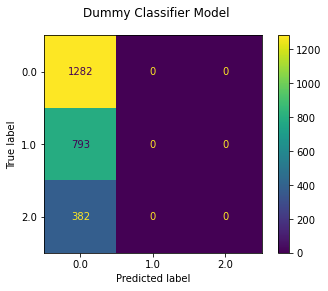

In [28]:
#confusion matrix for dummy classifer 
# Confusion matrix for the dummy model
fig, ax = plt.subplots()

fig.suptitle("Dummy Classifier Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, values_format='');

# model 2: simple logistic

In [29]:
#scaling data for a simple logistic regression 
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

simple_log_model = LogisticRegression(random_state=42)
simple_log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [30]:
# looking at predictiings 
y_pred_train = simple_log_model.predict(X_train_scaled)
y_pred_test = simple_log_model.predict(X_test_scaled)

print(f"Train Recall Score: {recall_score(y_train, y_pred_train, average='weighted')}")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test, average='weighted')}")

Train Recall Score: 0.733007733007733
Test Recall Score: 0.5658536585365853


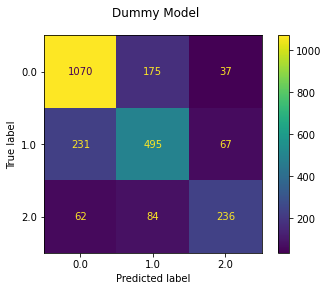

In [31]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(simple_log_model, X_train_scaled, y_train, ax=ax, values_format='');

# feature importance algos - explain how this will improve upon baselines

In [32]:
#feature importance

In [33]:
features = data_clean.columns
traindf = pd.DataFrame(data_clean, columns=features)
y = traindf['covid_mis_score']
X = traindf.copy()
del X['covid_mis_score']

In [34]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=100

In [35]:
# pearssom
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

100 selected features


In [36]:
#chi squared
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


In [37]:
#recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 369 features.
Fitting estimator with 359 features.
Fitting estimator with 349 features.
Fitting estimator with 339 features.
Fitting estimator with 329 features.
Fitting estimator with 319 features.
Fitting estimator with 309 features.
Fitting estimator with 299 features.
Fitting estimator with 289 features.
Fitting estimator with 279 features.
Fitting estimator with 269 features.
Fitting estimator with 259 features.
Fitting estimator with 249 features.
Fitting estimator with 239 features.
Fitting estimator with 229 features.
Fitting estimator with 219 features.
Fitting estimator with 209 features.
Fitting estimator with 199 features.
Fitting estimator with 189 features.
Fitting estimator with 179 features.
Fitting estimator with 169 features.
Fitting estimator with 159 features.
Fitting estimator with 149 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.


RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=100,
    step=10, verbose=5)

In [38]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


In [39]:
#lasso logistic 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", random_state=42), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(random_state=42), max_features=100)

In [40]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

100 selected features


In [41]:
#random forest 
# add in random state --> to get same results 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,  random_state=42), max_features=num_feats)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                max_features=100)

In [42]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')


100 selected features


In [43]:
# lets look at all of them 

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,whitejob,True,True,True,True,True,5
2,taxecon,True,True,True,True,True,5
3,talk2,True,True,True,True,True,5
4,immpres7,True,True,True,True,True,5
5,fundmt1,True,True,True,True,True,5
6,experts,True,True,True,True,True,5
7,econpres7,True,True,True,True,True,5
8,econnow,True,True,True,True,True,5
9,conf_covid2,True,True,True,True,True,5
10,abort1,True,True,True,True,True,5


In [63]:
# looks like there are 9 features that influential to our prediction/relationship with our covid variable, let's include some demographic variables here as well 
features9 = data_clean[['whitejob', 'taxecon', 'talk2', 'immpres7', 'fundmt1', 'experts', 'econnow', 'econpres7','conf_covid2','abort1', 'covid_mis_score']]
    
    
    

In [68]:
features9.head()

,whitejob,taxecon,talk2,immpres7,fundmt1,experts,econnow,econpres7,conf_covid2,abort1,covid_mis_score
0,3.000000,4.0,3.0,5.0,2.000000,3.0,2.0,3.0,5.0,4.0,0.0
1,3.000000,2.0,5.0,1.0,1.000000,4.0,2.0,2.0,4.0,4.0,0.0
2,2.000000,3.0,4.0,7.0,1.663576,4.0,5.0,7.0,4.0,2.0,0.0
3,4.000000,3.0,4.0,1.0,2.000000,4.0,5.0,2.0,2.0,4.0,0.0
4,2.386545,5.0,2.0,7.0,2.000000,4.0,5.0,6.0,4.0,4.0,0.0


# DO A DECISION TREE ON THOSE 9 

In [103]:
X = features9.drop(['covid_mis_score'], axis=1)
y = features9['covid_mis_score']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)



In [104]:
tree9_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree9_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [105]:
y_pred = tree9_clf.predict(X_test)

# Recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall score: {recall}")

Recall score: 0.5528455284552846


In [106]:
print(f'Train Accuracy Score:{tree9_clf.score(X_train, y_train)}')
print(f'Test Accuracy Score:{tree9_clf.score(X_test, y_test)}')

Train Accuracy Score:0.5958485958485958
Test Accuracy Score:0.5528455284552846


In [109]:
feat10_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, tree9_clf.feature_importances_)
}
feat10_import

{'whitejob': 0.08826835478331665,
 'taxecon': 0.0,
 'talk2': 0.0,
 'immpres7': 0.383920965414571,
 'fundmt1': 0.1127975643824479,
 'experts': 0.15153427174215114,
 'econnow': 0.06488243829805106,
 'econpres7': 0.0,
 'conf_covid2': 0.17791521991773795,
 'abort1': 0.020681185461724302}

In [110]:
sorted(feat10_import, key=feat9_import.get, reverse=True)

['immpres7',
 'conf_covid2',
 'experts',
 'fundmt1',
 'whitejob',
 'econnow',
 'abort1',
 'taxecon',
 'talk2',
 'econpres7']

In [111]:
dt_5 = data_clean[['immpres7', 'conf_covid2', 'experts', 'fundmt1', 'whitejob']]

# smote top 5 from DT

In [ ]:
# one option from towards data sceience 
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced,
                                                np.unique(target_Y),
                                                target_Y)

# logistic with best features 

In [ ]:
#now let's try a logistic regression with these features 

X = features9.drop(['covid_mis_score'], axis=1)
y = features9['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)



features_log = LogisticRegression(random_state=42)
features_log.fit(X_train_scaled, y_train )




In [ ]:
y_pred_train = features_log.predict(X_train_scaled)
y_pred_test = features_log.predict(X_test_scaled)

print(f"Train Recall Score: {recall_score(y_train, y_pred_train, average='weighted')}")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test, average='weighted')}")

In [ ]:
#confusionn matrix for model from above 
plot_confusion_matrix(features_log, X_test_scaled, y_test);

# logistic with only best featuress, no demographic variables 

In [ ]:
features_only = data_clean[['whitejob', 'taxecon', 'talk2', 'immpres7', 'fundmt1', 'experts', 'econnow', 'conf_covid2',
                        'abort1', 'covid_mis_score']]

In [ ]:

X = features_only.drop(['covid_mis_score'], axis=1)
y = features_only['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)



features_only_model = LogisticRegression(random_state=42)
features_only_model.fit(X_train_scaled, y_train )

In [ ]:
y_pred_train = features_only_model.predict(X_train_scaled)
y_pred_test = features_only_model.predict(X_test_scaled)

print(f"Train Recall Score: {recall_score(y_train, y_pred_train, average='weighted')}")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test, average='weighted')}")

#looks like keeping the demographic variables in does the model justice 

In [ ]:
#confusionn matrix for model from above 
plot_confusion_matrix(features_only_model, X_test_scaled, y_test);

# grid search for features log

In [ ]:
X = features9.drop(['covid_mis_score'], axis=1)
y = features9['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


In [ ]:
log_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1e-3, 1e-1, 1e2, 1e4, 1e6],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None]
}

In [ ]:
grid_search_log = GridSearchCV(features_log, log_grid, cv=3)
grid_search_log.fit(X_train_scaled, y_train)

print("The best parameter combinations for the features_log model that the GridSearch found are:")
      
grid_search_log.best_params_

In [ ]:

#play around with logistic hyper parameters 
# maybe do a decision tree or random foreest
# ic ould grid searcch thru different options for a random forest, with different number of max 
#XGBoost could help


#print out a confusion matrix for the log , could show relationships between confusion

In [ ]:

features_grid_model = LogisticRegression(random_state=42, C=0.100, class_weight= None, 
                                         penalty='l1', solver='saga')
features_grid_model.fit(X_train_scaled, y_train )

In [ ]:
y_pred_train = features_grid_model.predict(X_train_scaled)
y_pred_test = features_grid_model.predict(X_test_scaled)

print(f"Train Recall Score: {recall_score(y_train, y_pred_train, average='weighted')}")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test, average='weighted')}")

In [ ]:
plot_confusion_matrix(features_grid_model, X_test_scaled, y_test);

#  random forest 

In [ ]:
# i'm going to try a random forest now!
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_scaled, y_train)

In [ ]:
y_pred_rfc = rfc.predict(X_test_scaled)

recall_rfc = recall_score(y_test, y_pred_rfc, average='weighted')
print(f"Recall score: {recall_rfc}")
# Confusion matrix and classification report
print(classification_report(y_test, y_pred_rfc));
print(plot_confusion_matrix(rfc, X_test_scaled, y_test));

# random forest with grid search



In [ ]:
rfc_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
grid_rfc = GridSearchCV(rfc, rfc_grid, cv=3)
grid_rfc.fit(X_train_scaled, y_train)
print("Best Parameters for random forest:")
grid_rfc.best_params_

In [ ]:
best_rfc = RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth=7,
                                  max_features='auto', n_estimators = 500)

best_rfc.fit(X_train_scaled, y_train)


In [ ]:
# Predictions on test
y_pred_rfc_grid = best_rfc.predict(X_test_scaled)

# Recall Score
recall_rfc_grid = recall_score(y_test, y_pred_rfc_grid, average='weighted')
print(f"Recall score: {recall_rfc_grid}")

#best model so far

In [ ]:
print(plot_confusion_matrix(best_rfc, X_test_scaled, y_test));

# xgboost
# way over fit 

In [ ]:
boost_clf = XGBClassifier(random_state=42)
boost_clf.fit(X_train_scaled, y_train)
training_preds = boost_clf.predict(X_train_scaled)
test_preds = boost_clf.predict(X_test_scaled)


In [ ]:
training_recall = recall_score(y_train, training_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')

print('Training Recall: {:.4}%'.format(training_recall * 100))
print('Validation Recall: {:.4}%'.format(test_recall * 100))

#looks like the rfc grid is the best model so far

# xgboost with grid search 

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6, 10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [ ]:
grid_clf_boost = GridSearchCV(boost_clf, param_grid, scoring='recall_weighted', cv=None, n_jobs=1) 
grid_clf_boost.fit(X_train, y_train)

best_parameters = grid_clf_boost.best_params_
print(best_parameters)


In [ ]:
boost_grid = {
    'learning_rate': [0.1],
    'max_depth': [10],
    'min_child_weight': [2],
    'subsample': [0.5],
    'n_estimators': [100],
}

In [ ]:
boosted_grid = XGBClassifier(boost_grid, random_state=42)
boosted_grid.fit(X_train_scaled, y_train)
training_preds = boosted_grid.predict(X_train_scaled)
test_preds = boosted_grid.predict(X_test_scaled)

training_recall_boosted = recall_score(y_train, training_preds, average='weighted')
test_recall_boosted = recall_score(y_test, test_preds, average='weighted')

print('Training Recall: {:.4}%'.format(training_recall_boosted * 100))
print('Validation Recall: {:.4}%'.format(test_recall_boosted * 100))

#bad model --> data leakage?

# repeat modeling process with more features! 
looks like we're not getting anywhere, so i'll add in the features that show up 4x and 5x

In [ ]:
more_features = data_clean[['whitejob', 'taxecon', 'talk2', 'immpres7', 'fundmt1', 'experts', 'econnow', 'conf_covid2',
                        'abort1', 'votemail2', 'strpres1b', 'pidstr3', 'pidstr1', 'lcd', 'knowtran2_1', 'jbhonest', 
                            'impact9', 'immignum', 'hopeful', 'hlthcare1', 'excessive', 'econpres7', 'dtleader2',
                            'covid_elect', 'birthyr', 'covid_mis_score']]

In [ ]:
X = more_features.drop(['covid_mis_score'], axis=1)
y = more_features['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# random forest with more features bc that seemed to be the best

In [ ]:
rfc_more = RandomForestClassifier(random_state=42)
rfc_more.fit(X_train_scaled, y_train)

In [ ]:
y_pred_rfc = rfc_more.predict(X_test_scaled)

recall_rfc = recall_score(y_test, y_pred_rfc, average='weighted')
print(f"Recall score: {recall_rfc}")
# Confusion matrix and classification report
print(classification_report(y_test, y_pred_rfc));
print(plot_confusion_matrix(rfc_more, X_test_scaled, y_test));

# grid search random forest - best model so far

In [ ]:
rfc_grid_more = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
grid_rfc_more = GridSearchCV(rfc_more, rfc_grid_more, cv=3)
grid_rfc_more.fit(X_train_scaled, y_train)
print("Best Parameters for random forest:")
grid_rfc_more.best_params_

In [ ]:
best_rfc_more = RandomForestClassifier(random_state=42, criterion = 'gini', max_depth=8,
                                  max_features='log2', n_estimators = 500)

best_rfc_more.fit(X_train_scaled, y_train)

In [ ]:
# Predictions on test
y_pred_rfc_grid_more = best_rfc_more.predict(X_test_scaled)

# Recall Score
recall_rfc_grid_more = recall_score(y_test, y_pred_rfc_grid_more, average='weighted')
print(f"Recall score: {recall_rfc_grid_more}")

#best model so far

In [ ]:
print(plot_confusion_matrix(best_rfc_more, X_test_scaled, y_test));

# new idea 
- i will drop all the features that are not in my best 100 
- do a decision tree on that 
- take the most important from thatt 
- then do a logistic grid search 
- then do a random forest grid search 

In [ ]:
feature_df = feature_selection_df.head(num_feats)

In [ ]:
list(feature_df['Feature'])

In [ ]:
model_df = data_clean[['covid_mis_score','whitejob',
 'taxecon',
 'talk2',
 'immpres7',
 'fundmt1',
 'experts',
 'econnow',
 'conf_covid2',
 'abort1',
 'votemail2',
 'viol2a',
 'strpres1b',
 'pidstr3',
 'pidstr1',
 'lcd',
 'knowtran2_1',
 'jbhonest',
 'impact9',
 'immignum',
 'hopeful',
 'hlthcare1',
 'excessive',
 'econpres7',
 'dtleader2',
 'covid_elect',
 'birthyr',
 'wall7',
 'votecount',
 'viol2b',
 'viol1',
 'talk3',
 'stress4',
 'speech1',
 'selfmon4',
 'science',
 'rural4',
 'rural2',
 'rr4',
 'rr1',
 'return',
 'protest',
 'moralcert6',
 'lcself',
 'lcr',
 'knowtran2_2',
 'intelsup1',
 'inc_anes',
 'impeach2',
 'impeach1',
 'impact8',
 'impact6',
 'impact5',
 'impact4',
 'impact1',
 'fundmt2',
 'ftwarren1',
 'fttransppl',
 'ftrubio1',
 'ftpence1',
 'ftharris1',
 'ftdemocraticparty',
 'ftcapitalists',
 'ftbuttigieg1',
 'ftblack',
 'frnpres7',
 'finworry',
 'femid2_fem',
 'exphelp',
 'dtknow',
 'dthonest',
 'dtdignif',
 'dtcares',
 'dtauth',
 'depress4',
 'depress1',
 'conf_covid1',
 'callout_social',
 'att1',
 'apppres7',
 'age',
 'affact',
 'abort2',
 'worried',
 'voterid2',
 'voterid1',
 'viol3_both',
 'socmed_9',
 'socmed_7',
 'socmed_6',
 'socmed_3',
 'selfmon6',
 'selfmon3',
 'selfmon2',
 'selfcensor',
 'rural3',
 'rr_scale',
 'richpoor2',
 'relig2a',
 'regulate2',
 'race7']]
 


In [ ]:
model_df.head()

# decision tree with model_df

In [ ]:
X = model_df.drop(['covid_mis_score'], axis=1)
y = model_df['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth = 4, random_state=42)
tree_clf.fit(X_train_scaled, y_train)

In [ ]:
print(f'Train Accuracy Score:{tree_clf.score(X_train_scaled, y_train)}')
print(f'Test Accuracy Score:{tree_clf.score(X_test_scaled, y_test)}')

In [ ]:
y_pred = tree_clf.predict(X_test_scaled)

# Recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall score: {recall}")

In [ ]:
plot_confusion_matrix(tree_clf, X_test, y_test);

# grid search decision tree model_df
- didn't help at all

In [ ]:
tree_param = [{'criterion': ['entropy', 'gini'], 
               'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]


In [ ]:
grid_search_tree = GridSearchCV(tree_clf, tree_param, cv=3)
grid_search_tree.fit(X_train_scaled, y_train)

print("The best parameter combinations for the features_log model that the GridSearch found are:")
      
grid_search_tree.best_params_

In [ ]:
tree_clf_grid = DecisionTreeClassifier(max_depth = 4, random_state=42, criterion='entropy')
tree_clf_grid.fit(X_train_scaled, y_train)

In [ ]:
print(f'Train Accuracy Score:{tree_clf_grid.score(X_train_scaled, y_train)}')
print(f'Test Accuracy Score:{tree_clf_grid.score(X_test_scaled, y_test)}')

In [ ]:
y_pred = tree_clf_grid.predict(X_test_scaled)

# Recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall score: {recall}")

In [ ]:
plot_confusion_matrix(tree_clf, X_test, y_test);

# random forest with model_df

In [ ]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred_rfc_model = rfc_model.predict(X_test_scaled)

recall_rfc_model = recall_score(y_test, y_pred_rfc_model, average='weighted')
print(f"Recall score: {recall_rfc_model}")
# Confusion matrix and classification report
print(classification_report(y_test, y_pred_rfc_model));
print(plot_confusion_matrix(rfc_model, X_test_scaled, y_test));

In [ ]:
rfc_grid_model = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
grid_rfc_model = GridSearchCV(rfc_model, rfc_grid_model, cv=3)
grid_rfc_model.fit(X_train_scaled, y_train)
print("Best Parameters for random forest:")
grid_rfc_model.best_params_

In [ ]:
rfc_model_grid = RandomForestClassifier(random_state=42, criterion = 'entropy', max_depth=10,
                                  max_features='auto', n_estimators = 200)

rfc_model_grid.fit(X_train_scaled, y_train)

In [ ]:
# Predictions on test
y_pred_rfc_grid_model = rfc_model_grid.predict(X_test_scaled)

# Recall Score
recall_rfc_grid_model = recall_score(y_test, y_pred_rfc_grid_model, average='weighted')
print(f"Recall score: {recall_rfc_grid_model}")



In [ ]:
print(plot_confusion_matrix(rfc_model_grid, X_test_scaled, y_test));
#not as good as the random forsest grid search on the largest data set 


#join y preds to DF and if the y pred is whateverr, just slice it -- maybe there would be something worthwhile 

# let's just do a plain old regressionn grid search

In [ ]:
simple_log_model = LogisticRegression(random_state=42)
simple_log_model.fit(X_train_scaled, y_train)

In [ ]:
# this is the best model so far 


y_pred_train = simple_log_model.predict(X_train_scaled)
y_pred_test = simple_log_model.predict(X_test_scaled)

print(f"Train Recall Score: {recall_score(y_train, y_pred_train, average='weighted')}")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test, average='weighted')}")

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1e-3, 1e-1, 1e2, 1e4, 1e6],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None]
}

In [ ]:
grid_search = GridSearchCV(simple_log_model, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameter Combination Found During Grid Search:")
grid_search.best_params_

In [ ]:
model_log_model = LogisticRegression(random_state=42, C= 0.001, 
                                      class_weight= None, penalty= 'l2', 
                                      solver= 'lbfgs')
model_log_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred_grid_model = model_log_model.predict(X_test_scaled)

# Recall Score
recall_grid = recall_score(y_test, y_pred_grid_model, average='weighted')
print(f"Recall score: {recall_grid}")

#looks like the simple log model is still the best!!

In [ ]:
#henry: random resample across whole DF

#patrick: maybe its just fine 

# ok imma try and smote 

#run some models with 4,5 & the demographic 

#try ada boost 

#try the subsetting idea 

# do a decision tree --> log model

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train_scaled, y_train)

In [ ]:
print(f'Train Accuracy Score:{tree_clf.score(X_train_scaled, y_train)}')
print(f'Test Accuracy Score:{tree_clf.score(X_test_scaled, y_test)}')

In [ ]:
y_pred = tree_clf.predict(X_test_scaled)

# Recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall score: {recall}")

In [ ]:
feat_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, tree_clf.feature_importances_)
}
feat_import


In [ ]:
sorted(feat_import, key=feat_import.get, reverse=True)

In [ ]:
plt.figure(figsize=(12,12), dpi = 500)
plot_tree(tree_clf,
 feature_names = X.columns,
 filled = True, rounded = True)
plt.title("Decision Tree Based on All Features")
plt.show()

# logistic model after decison tree feature importance 

In [ ]:

X = data_clean[['dtdignif',
 'impact8',
 'conf_covid2',
 'fttransppl',
 'viol1',
 'fundmt2',
 'wall7',
 'lcr',
 'ftpence1',
 'conf_covid1',
 'votemail2',
 'whitejob',
 'lcd',
 'pidstr1',
 'knowtran2_1',
 'taxecon']]
y = data_clean['covid_mis_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)



dt_log = LogisticRegression(random_state=42)
dt_log.fit(X_train_scaled, y_train )

In [ ]:
y_pred_train = dt_log.predict(X_train_scaled)
y_pred_test = dt_log.predict(X_test_scaled)

print(f"Train Recall Score: {recall_score(y_train, y_pred_train, average='weighted')}")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test, average='weighted')}")